# Вариант 22

Набор данных / Регуляризаторы

4 / 2, 3

Кодировка классификаторов:2 – линейная регрессия, LASSO регуляризатор;
3 – линейная регрессия, RIDGE регуляризатор;

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV, Ridge
from sklearn.model_selection import GridSearchCV
%matplotlib inline
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(R'C:\Users\qwerty\Desktop\Новая папка (2)\МО\ЛР4\airfoil_self_noise.dat.txt', sep='\t',decimal = '.')

In [3]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
print(df.isnull().sum())

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64


In [5]:
print('Размер набора', df.shape)
#удаляем повторы
df.drop_duplicates(keep='first', inplace = True)
print('Новый размер набора', df.shape)

Размер набора (1503, 6)
Новый размер набора (1503, 6)


<AxesSubplot:>

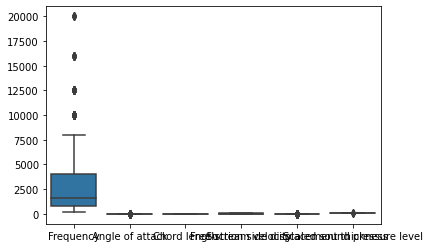

In [6]:
sns.boxplot(data = df)

In [7]:
scaler = StandardScaler()
columns = df.columns
df[columns] = scaler.fit_transform(df[columns])

<AxesSubplot:>

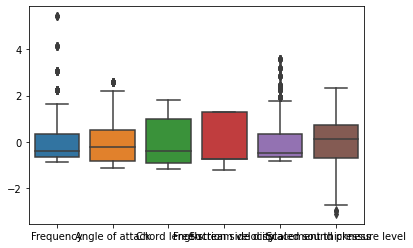

In [8]:
sns.boxplot(data = df)

In [9]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,-0.662023,-1.146403,1.799299,1.312935,-0.644805,0.197939
1,-0.598561,-1.146403,1.799299,1.312935,-0.644805,0.052935
2,-0.519235,-1.146403,1.799299,1.312935,-0.644805,0.161688
3,-0.408177,-1.146403,1.799299,1.312935,-0.644805,0.399494
4,-0.281255,-1.146403,1.799299,1.312935,-0.644805,0.380644
...,...,...,...,...,...,...
1498,-0.122601,1.490443,-0.373740,-0.723345,3.172773,-2.112990
1499,0.083648,1.490443,-0.373740,-0.723345,3.172773,-2.259444
1500,0.353359,1.490443,-0.373740,-0.723345,3.172773,-2.643705
1501,0.670666,1.490443,-0.373740,-0.723345,3.172773,-2.698806


<AxesSubplot:>

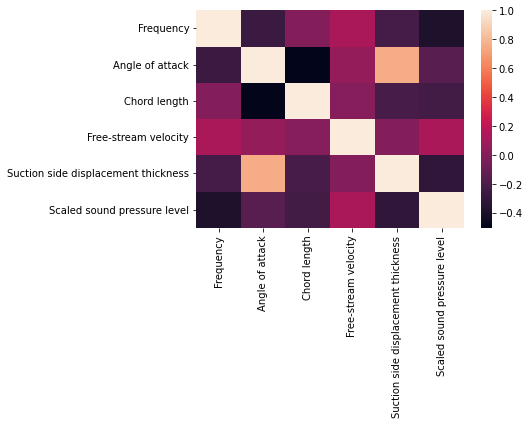

In [10]:
sns.heatmap(df.corr())

# линейная регрессия, LASSO регуляризатор

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [12]:
x = df.drop(['Scaled sound pressure level'], axis = 1)
y = df['Scaled sound pressure level']

In [13]:
print(x.head(), '\n \n', y.head())

   Frequency  Angle of attack  Chord length  Free-stream velocity  \
0  -0.662023        -1.146403      1.799299              1.312935   
1  -0.598561        -1.146403      1.799299              1.312935   
2  -0.519235        -1.146403      1.799299              1.312935   
3  -0.408177        -1.146403      1.799299              1.312935   
4  -0.281255        -1.146403      1.799299              1.312935   

   Suction side displacement thickness  
0                            -0.644805  
1                            -0.644805  
2                            -0.644805  
3                            -0.644805  
4                            -0.644805   
 
 0    0.197939
1    0.052935
2    0.161688
3    0.399494
4    0.380644
Name: Scaled sound pressure level, dtype: float64


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
reg = LinearRegression().fit(x_train, y_train)

In [16]:
pred = reg.predict(x_test)

In [17]:
print('Коэффициенты = ', list(zip(reg.coef_, x)), reg.intercept_)

Коэффициенты =  [(-0.5851279354492877, 'Frequency'), (-0.35238536020073435, 'Angle of attack'), (-0.4885761112318309, 'Chord length'), (0.221568929559008, 'Free-stream velocity'), (-0.27470224430855217, 'Suction side displacement thickness')] -0.0007815273677316285


In [18]:
print('MSE = ', mean_squared_error(y_test, pred))

MSE =  0.4366103723974334


In [19]:
print('R^2 = ', r2_score(y_test, pred))

R^2 =  0.5585557273100985


In [20]:
reg = LassoCV().fit(x_train, y_train)

In [21]:
print('Коэффициенты = ', list(zip(reg.coef_, x)), reg.intercept_)

Коэффициенты =  [(-0.5842515176219911, 'Frequency'), (-0.35102869795060615, 'Angle of attack'), (-0.48748781914488654, 'Chord length'), (0.22093150929027466, 'Free-stream velocity'), (-0.27484257097492915, 'Suction side displacement thickness')] -0.0007758538817491539


In [22]:
pred = reg.predict(x_test)

In [23]:
print('MSE = ', mean_squared_error(y_test, pred))
print('R^2 = ', r2_score(y_test, pred))

MSE =  0.4366796796010165
R^2 =  0.5584856527768025


In [24]:
#Реальные значения
#Frequency	Angle of attack	  Chord length	Free-stream velocity	Suction side displacement thickness	 Scaled sound pressure level
#-0.662023        -1.146403    1.799299	            1.312935                  -0.644805                     0.197939

In [25]:
pred1 = ( (-0.662023)*(-0.5842515176219911) -1.146403*(-0.35102869795060615) + 1.799299*(-0.48748781914488654) + 1.312935*0.22093150929027466 - 0.644805*(-0.27484257097492915) - 0.0007758538817491539 )
pred2 = ( (-0.598561)*(-0.5842515176219911) -1.146403*(-0.35102869795060615) + 1.799299*(-0.48748781914488654) + 1.312935*0.22093150929027466 - 0.644805*(-0.27484257097492915) - 0.0007758538817491539 )
pred3 = ( (-0.519235)*(-0.5842515176219911) -1.146403*(-0.35102869795060615) + 1.799299*(-0.48748781914488654) + 1.312935*0.22093150929027466 - 0.644805*(-0.27484257097492915) - 0.0007758538817491539 )

In [26]:
real1 = 0.197939
real2 = 0.052935
real3 = 0.161688
print('Разница между реальным значением и предсказанным = \n', real1 - pred1 )

Разница между реальным значением и предсказанным = 
 -0.1806456706135238


In [27]:
stats.spearmanr([pred1, pred2, pred3], [real1, real2, real3])

SpearmanrResult(correlation=0.5, pvalue=0.6666666666666667)

In [28]:
stats.pearsonr([pred1, pred2, pred3], [real1, real2, real3])

(0.17756048986235315, 0.8863589181385209)

# линейная регрессия, RIDGE регуляризатор;

In [29]:
reg = Ridge().fit(x_train, y_train)

In [30]:
print('Коэффициенты = ', list(zip(reg.coef_, x)), reg.intercept_)
pred = reg.predict(x_test)

Коэффициенты =  [(-0.5843131027051879, 'Frequency'), (-0.3511666647229455, 'Angle of attack'), (-0.4876259087063548, 'Chord length'), (0.22120186988736742, 'Free-stream velocity'), (-0.27499259230216166, 'Suction side displacement thickness')] -0.0007799813429199391


In [31]:
print('MSE = ', mean_squared_error(y_test, pred))
print('R^2 = ', r2_score(y_test, pred))

MSE =  0.43664447309940985
R^2 =  0.5585212490646561


In [32]:
reg = RidgeCV().fit(x_train, y_train)

In [33]:
print('Коэффициенты = ', list(zip(reg.coef_, x)), reg.intercept_)
pred = reg.predict(x_test)

Коэффициенты =  [(-0.5843131027054702, 'Frequency'), (-0.3511666647225417, 'Angle of attack'), (-0.4876259087058782, 'Chord length'), (0.22120186988705876, 'Free-stream velocity'), (-0.2749925923016005, 'Suction side displacement thickness')] -0.000779981342916222


In [34]:
print('MSE = ', mean_squared_error(y_test, pred))
print('R^2 = ', r2_score(y_test, pred))

MSE =  0.4366444730995231
R^2 =  0.5585212490645415


In [35]:
pred1 = ( (-0.662023)*(-0.5843131027054702) -1.146403*(-0.3511666647225417) + 1.799299*(-0.4876259087058782) + 1.312935*0.22120186988705876 - 0.644805*(-0.2749925923016005) - 0.000779981342916222 )
pred2 = ( (-0.598561)*(-0.5843131027054702) -1.146403*(-0.3511666647225417) + 1.799299*(-0.4876259087058782) + 1.312935*0.22120186988705876 - 0.644805*(-0.2749925923016005) - 0.000779981342916222 )
pred3 = ( (-0.519235)*(--0.5843131027054702) -1.146403*(-0.3511666647225417) + 1.799299*(-0.4876259087058782) + 1.312935*0.22120186988705876 - 0.644805*(-0.2749925923016005) - 0.000779981342916222 )

In [36]:
real1 = 0.197939
real2 = 0.052935
real3 = 0.161688
print('Разница между реальным значением и предсказанным = \n', real1 - pred1 )

Разница между реальным значением и предсказанным = 
 -0.18104371539800432


In [37]:
stats.spearmanr([pred1, pred2, pred3], [real1, real2, real3])

SpearmanrResult(correlation=0.5, pvalue=0.6666666666666667)

In [38]:
stats.pearsonr([pred1, pred2, pred3], [real1, real2, real3])

(-0.23115101287118664, 0.8515017094344031)